# The NumPy Array Object

In [1]:
# The recommended convention to import numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.array([0, 1, 2, 4])
a

array([0, 1, 2, 4])

In [3]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.lib.Arrayterator
    Buffered iterator for big arrays.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
nu

In [4]:
np.con*?

np.concatenate
np.conj
np.conjugate
np.convolve

## Creating Arrays


In [5]:
# 2D
a = np.array([[0, 1, 2], [3, 4, 5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [6]:
a.ndim

2

In [7]:
a.shape

(2, 3)

In [8]:
len(a) # returns the size of the first dimension

2

In [9]:
b = np.array([[[1], [2], [3], [4]]])
b

array([[[1],
        [2],
        [3],
        [4]]])

In [10]:
b.shape

(1, 4, 1)

In [11]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [12]:
c.shape

(2, 2, 1)

## Function for creating arrays

In practice, we rarely enter items one by one...

Evenly spaced:

In [13]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np.arange(1, 9, 2) # start, end (exclusive), step

array([1, 3, 5, 7])

Or by number of points

In [15]:
np.linspace(0, 1, 6) # start, end, num-points

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [16]:
np.linspace(0, 1, 5, endpoint=False)

array([0. , 0.2, 0.4, 0.6, 0.8])

Common arrays:

In [17]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [18]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [19]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
np.diag([1, 2, 3, 4, 5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

np.random: random numbers (Mersenne Twister PRNG):

In [21]:
# uniform in [0, 1]
np.random.rand(4) 

array([0.17297349, 0.61421548, 0.75539922, 0.95993419])

In [22]:
# Gaussian
np.random.randn(4) 

array([-0.96871287,  0.39901384, -0.37074978,  0.47592909])

In [23]:
# Setting the random seed
np.random.seed(1234)

## Indexing and Slicing

In [24]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
a[0], a[2], a[-1]

(0, 2, 9)

The usual python idiom for reversing a sequence is supported:

In [26]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

For multidimensional arrays, indices are tuples of integers:

In [27]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [28]:
a[2, 1] = 10
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

<div class="alert alert-block alert-info">
<b>Note:</b><br> 
1) In 2D, the first dimension corresponds to rows, the second to columns.<br>
2) for multidimensional a, a[0] is interpreted by taking all elements in the unspecified dimensions.</div>

In [29]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Note that the last index is not included

In [31]:
a[:4]

array([0, 1, 2, 3])

All three slice components are not required: 
* start is 0
* end is the last
* step is 1

In [32]:
a[1:3]

array([1, 2])

In [33]:
a[::2]

array([0, 2, 4, 6, 8])

In [34]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

A small illustrated summary of Numpy indexing and slicing...

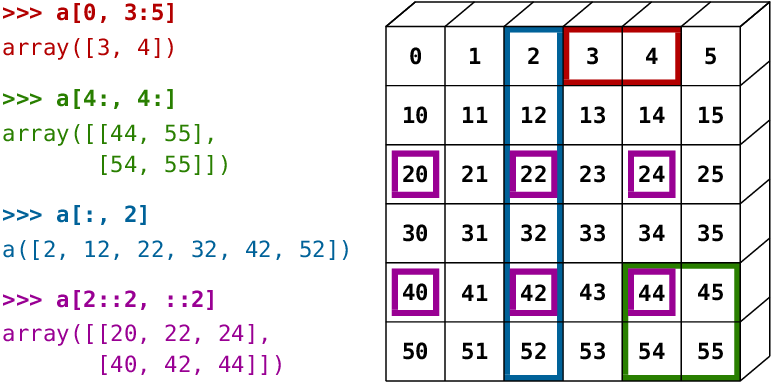

You can also combine assignment ans slicing:

In [35]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

## Copies and Views

A slicing operation creates a view on the original array, which is just a way of accessing array data. Thus the original array is not copied in memory. You can use `np.may_share_memory()` to check if two arrays share the same memory block. Note however, that this uses heuristics and may give you false positives.

**When modifying the view, the original array is modified as well**:

In [36]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [38]:
np.may_share_memory(a, b)

True

In [39]:
b[0] = 12
a

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [40]:
a[0] = 0
b

array([0, 2, 4, 6, 8])

In [41]:
c = a[::2].copy()
c

array([0, 2, 4, 6, 8])

In [42]:
c[0] = 12
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Fancy Indexing

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (**masks**). This method is called *fancy indexing*. It creates **copies not views**.

### Using boolean masks

In [43]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [44]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [45]:
mask = (a % 3 == 0)
extract_from_a = a[mask]
extract_from_a

array([ 3,  0,  9,  6,  0, 12])

Indexing with a mask can be very useful to assign a new value to a sub-array:

In [46]:
a[a%3==0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### Indexing with an array of integers

In [47]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

<code style="background:yellow;color:black">Indexing can be done with an array of integers, where the same index is repeated several time: </code>

In [48]:
a[[2, 3, 2, 4, 2]] # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

New values can be assigned with this kind of indexing:

In [49]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

When a new array is created  by indexing with an array of integers, the new array has the same shape as the array of integers:

In [50]:
a = np.arange(10)
idx = np.array([[3, 4], [9, 7]])
idx.shape

(2, 2)

In [51]:
a[idx]

array([[3, 4],
       [9, 7]])

The image below illustrates various fancy indexing applications
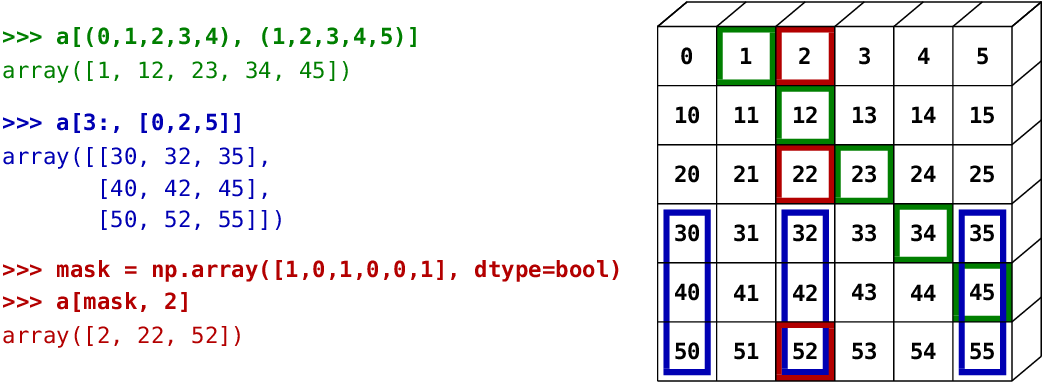

Let's try the above fancy indexing applications. We start first by create the above numpy matrix.

In [52]:
np.arange(0, 51, 10)[:, np.newaxis]

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50]])

In [53]:
a = np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [54]:
a[(0, 1, 2, 3, 4), (1, 2, 3, 4, 5)]

array([ 1, 12, 23, 34, 45])

In [55]:
a[3:, [0, 2, 5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [56]:
mask = np.array([1, 0, 1, 0, 0, 1], dtype=bool)
a[mask, 2]

array([ 2, 22, 52])

## Numerical Operations on Arrays


In [57]:
# Matrix multiplication
c = np.ones((3, 3))
c @ c

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [58]:
# comparisons
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [59]:
a > b

array([False, False,  True, False])

In [60]:
# Array-wise comparisons:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])

In [61]:
np.array_equal(a, b)

False

In [62]:
np.array_equal(a, c)

True

In [63]:
# Logical operations:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)

In [64]:
np.logical_or(a, b)

array([ True,  True,  True, False])

In [65]:
np.logical_and(a, b)

array([ True, False, False, False])

In [66]:
# Transcendental functions:
a = np.arange(1, 6)
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427])

In [67]:
np.log(a)

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

In [68]:
np.exp(a)

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

In [69]:
# Transposition
np.triu(np.ones((3, 3)))

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [70]:
a = np.triu(np.ones((3, 3)), 1)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [71]:
a.T

array([[0., 0., 0.],
       [1., 0., 0.],
       [1., 1., 0.]])

<code style="background:yellow;color:black">Note the transposition is a view!</code>
The transpose returns a view of the original array:

In [72]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [73]:
a.T[0, 2]

6

In [74]:
a.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [75]:
# computing sums
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [76]:
x.sum()

6

In [77]:
x.sum(axis=0) # columns (first dimension)

array([3, 3])

In [78]:
x.sum(axis=1) # rows

array([2, 4])

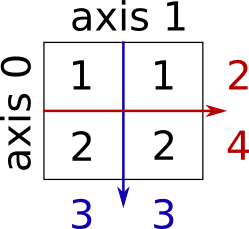

In [79]:
np.all([True, True, False])

False

In [80]:
np.any([True, True, False])

True

That can be used for array comparisons. For instance if we want to check if at least one value is 0 or all values are 0:

In [81]:
a = np.zeros((100, 100))
np.any(a!=0)

False

In [82]:
np.all(a==0)

True

In [83]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])
((a <= b) & (b <= c))

array([ True,  True,  True,  True])

In [84]:
((a <= b) & (b <= c)).all()

True

## Worked Example: Diffusion using a random walk algorithm

Let us consider a simple 1D random walk process: at each time step a walker jumps right or left with equal probability.  

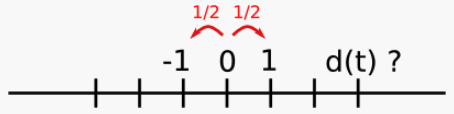

We are interested in finding the typical distance from the origin of a random walker after `t` left or right jumps?
We are going to simulate many "walkers" to find this law, and we are going to do so using array computing tricks: we are going to create a 2D array with the "stories" (each walker has a story) in one direction, and the time in the other:

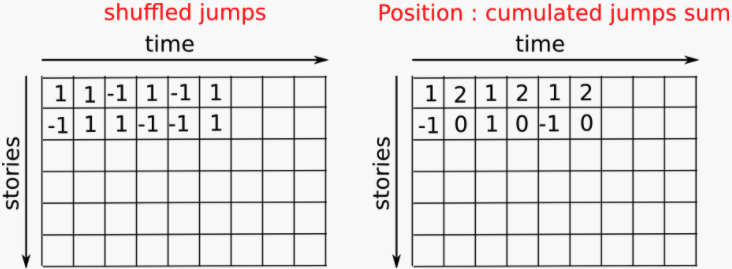

In [85]:
# number of walkers
n_stories = 1000

# time during which we follow the walker
t_max = 200 

We randomly choose all the steps 1 or -1 of the walk:

In [86]:
t = np.arange(t_max)
# +1 because the high value is exclusive
steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1

In [87]:
print(f"Unique values: {np.unique(steps)}")
steps[:5, :5]

Unique values: [-1  1]


array([[-1, -1,  1, -1, -1],
       [-1,  1, -1,  1, -1],
       [-1,  1, -1, -1,  1],
       [-1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1]])

We build the walks by summing steps along the time:

In [88]:
positions = np.cumsum(steps, axis=1) # axis = 1: dimension of time
sq_distance = positions**2

We get the mean in the axis of the stories:

In [90]:
mean_sq_distance = np.mean(sq_distance, axis=0)

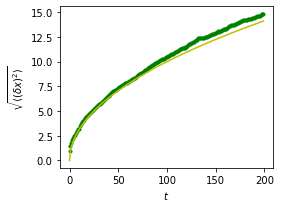

In [91]:
plt.figure(figsize=(4, 3)) 
plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-') 
plt.xlabel(r"$t$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 
plt.tight_layout() # provide sufficient space for labels